In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Faster R-CNN

In [2]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 131MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
device

device(type='cpu')

In [4]:
import cv2
import numpy as np
from torchvision.transforms import functional as F

# Open the video file
video = cv2.VideoCapture('/content/drive/MyDrive/Colab_Notebooks/Videos/Football_Match_CV.mp4')

In [5]:
video

< cv2.VideoCapture 0x7b6e3df2d970>

In [6]:
# Get video properties
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [7]:
width

1280

In [8]:
height

720

In [9]:
fps

25.0

In [ ]:
# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/drive/MyDrive/Colab_Notebooks/Videos/Output_Football_Matchtracking.mp4', fourcc, fps, (width, height))

In [ ]:
out

< cv2.VideoWriter 0x7dc48c3f7cb0>

In [ ]:
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Convert frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert to tensor and normalize
    input_tensor = F.to_tensor(rgb_frame).unsqueeze(0).to(device)

    # Perform inference
    with torch.no_grad():
        prediction = model(input_tensor)

    # Process the prediction and draw bounding boxes
    for box, score, label in zip(prediction[0]['boxes'], prediction[0]['scores'], prediction[0]['labels']):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = box.cpu().numpy().astype(int)
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label}: {score:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Write the frame to the output video
    out.write(frame)

# Release resources
video.release()
out.release()
cv2.destroyAllWindows()

##### Explanation of Faster R-CNN

1. Feature Extraction

The first step in Faster R-CNN is to extract features from the input image using a convolutional neural network (CNN). This CNN acts as a backbone and is typically a pre-trained network like ResNet, VGG, or Inception. It processes the image and generates a feature map that contains rich information about the image content. The output of the CNN is then used as input for the subsequent stages.

2. Region Proposal Network (RPN)

The Region Proposal Network is a key component of Faster R-CNN. It takes the feature map from the previous stage and generates a set of object proposals, also known as regions of interest (RoIs). These proposals are essentially bounding boxes that likely contain objects of interest. The RPN uses a sliding window approach to scan the feature map and predict the probability of an object being present at each location. It also predicts bounding box coordinates for the potential objects.

3. Region of Interest (RoI) Pooling

The regions generated by RPN can vary in size and shape and hence are transformed into fixed-sized feature maps by ROI pooling. This involves extracting a fixed-sized region from the feature map corresponding to each region proposal. The extracted regions are then pooled to produce a feature vector of a fixed dimension that can be fed into a classifier.

 4. Classification and Bounding Box Regression

The final stage of Faster R-CNN involves classifying the object in each region proposal and refining its bounding box. Each RoI is passed through fully connected layers for classification and regression. The classification branch predicts the class label of the object, while the regression branch adjusts the coordinates of the bounding box to more accurately locate the object. The model uses a softmax layer for classification to obtain class probabilities, and a regression layer to adjust the bounding box coordinates.

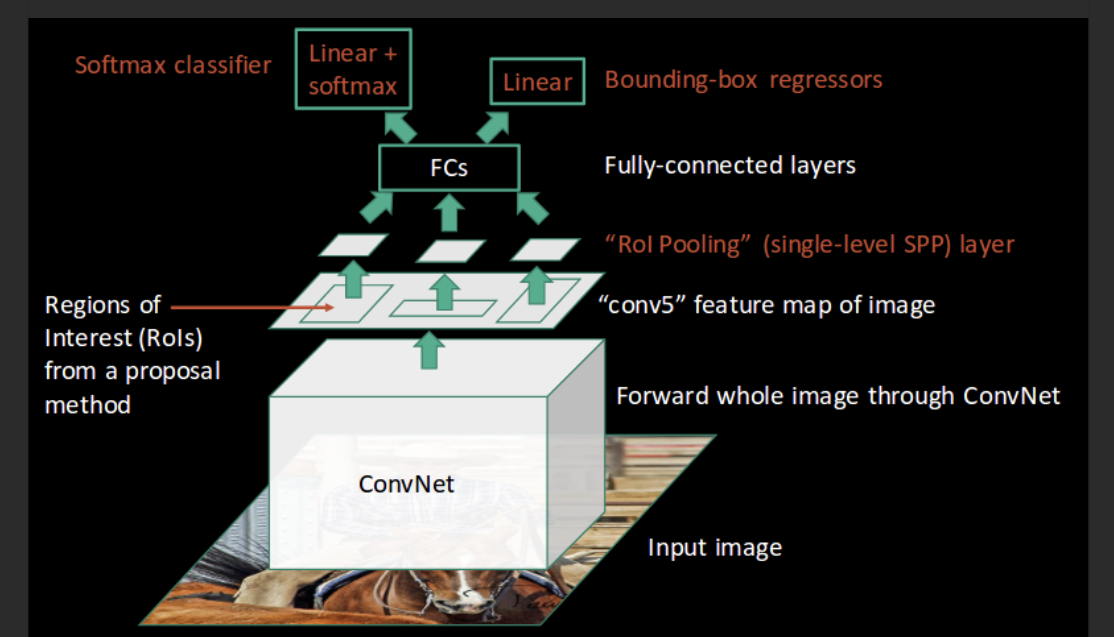

In [14]:
from IPython.display import Image
Image(filename='Faster-RCNN.png')

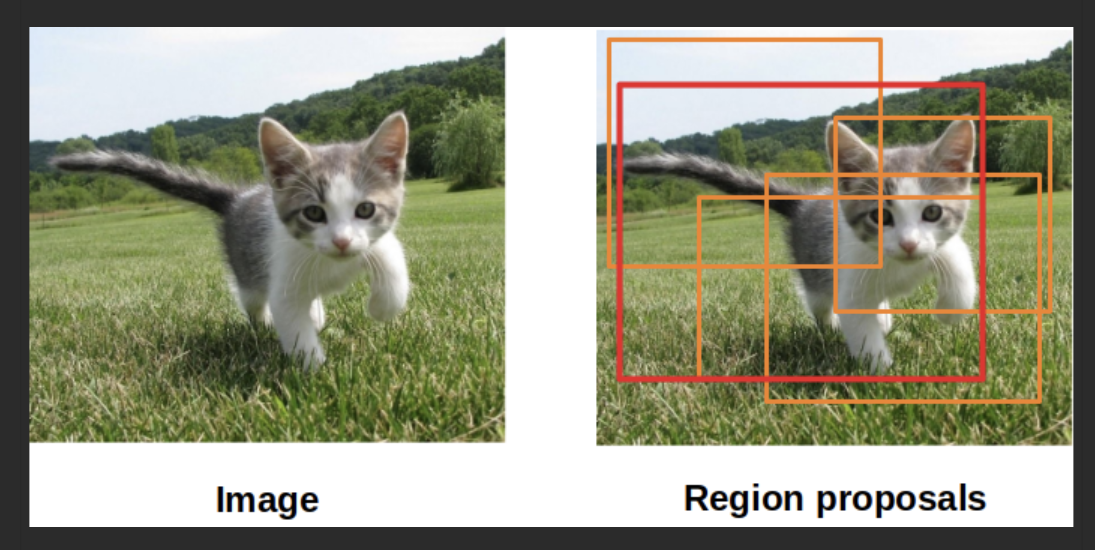

In [17]:
Image(filename='Region-Proposals.png')

#### Deep Sort

In [11]:
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 10.3 MB/s eta 0:00:00


In [ ]:
# Initialize DeepSort
deepsort = DeepSort(
    'deep_sort_realtime/deep_sort/deep/checkpoint/ckpt.t7',
    max_dist=0.2,
    min_confidence=0.3,
    nms_max_overlap=1.0,
    max_iou_distance=0.7,
    max_age=70,
    n_init=3,
    nn_budget=100,
    use_cuda=True
)

# Open the video file
video_path = '/content/drive/MyDrive/Colab_Notebooks/Videos/Football_Match_CV.mp4'  # Update with your video path
video = cv2.VideoCapture(video_path)

# Get video properties
fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/drive/MyDrive/Colab_Notebooks/Videos/Output_Football_Matchtracking_ID.mp4', fourcc, fps, (width, height))

# Process the video
while True:
    ret, frame = video.read()
    if not ret:
        break

    # Convert frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert to tensor and normalize
    input_tensor = F.to_tensor(rgb_frame).unsqueeze(0).to(device)

    # Perform inference
    with torch.no_grad():
        prediction = model(input_tensor)

    # Get bounding boxes, scores, and labels for DeepSort
    bbox_xywh = []
    confs = []
    clss = []

    for box, score, label in zip(prediction[0]['boxes'], prediction[0]['scores'], prediction[0]['labels']):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = box.cpu().numpy().astype(int)
            bbox_xywh.append([x1, y1, x2 - x1, y2 - y1])  # Convert to [x, y, w, h]
            confs.append([score.item()])
            clss.append([label.item()])

    xywhs = torch.Tensor(bbox_xywh)
    confss = torch.Tensor(confs)

    # Pass detections to DeepSort
    outputs = deepsort.update(xywhs, confss, clss, frame)

    # Draw bounding boxes and track IDs
    if len(outputs) > 0:
        for j, (output, conf) in enumerate(zip(outputs, confss)):
            bbox = output[0:4]
            id = output[4]
            cls = output[5]

            cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])), (255, 0, 0), 2)
            cv2.putText(frame, f'{id} {conf:.2f}', (int(bbox[0]), int(bbox[1] - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

#### Deep SORT

1. Object Detection (Faster R-CNN)

Detects objects in each frame using a pre-trained Faster R-CNN model.
Outputs bounding boxes, confidence scores, and class labels for detected objects.

2. DeepSORT

Tracks objects across frames by associating detections with unique IDs.
Uses a combination of Kalman filtering and the Hungarian algorithm to predict object motion and match detections.


3. Kalman Filtering

Predicts the state (position, velocity) of each tracked object based on its previous state and motion model.

Equations:

Prediction:

x'(k) = F * x(k-1) + B * u(k)

P'(k) = F * P(k-1) * F^T + Q

Update:

y(k) = z(k) - H * x'(k)

S(k) = H * P'(k) * H^T + R

K(k) = P'(k) * H^T * S(k)^-1

x(k) = x'(k) + K(k) * y(k)

P(k) = (I - K(k) * H) * P'(k)

Where:

x(k): State vector at time k

P(k): State covariance matrix at time k

F: State transition matrix

B: Control input matrix

u(k): Control input vector at time k

Q: Process noise covariance matrix

z(k): Measurement vector at time k

H: Measurement matrix

R: Measurement noise covariance matrix

y(k): Measurement residual

S(k): Innovation covariance matrix

K(k): Kalman gain


4. Hungarian Algorithm

Solves the assignment problem of matching new detections with existing tracks.
Minimizes the total cost of assigning detections to tracks based on their distances (e.g., using bounding box IoU).
The provided implementation uses the Hungarian algorithm to find the optimal assignment between predicted tracks and new detections, minimizing the overall cost based on a distance metric. This ensures that tracks are assigned to the most likely detections, even if there are occlusions or temporary disappearances of objects.

5. Output (Tracked Objects)

Provides the final output of the tracking solution, including the tracked object IDs, bounding boxes, and potentially other information like class labels or trajectories.

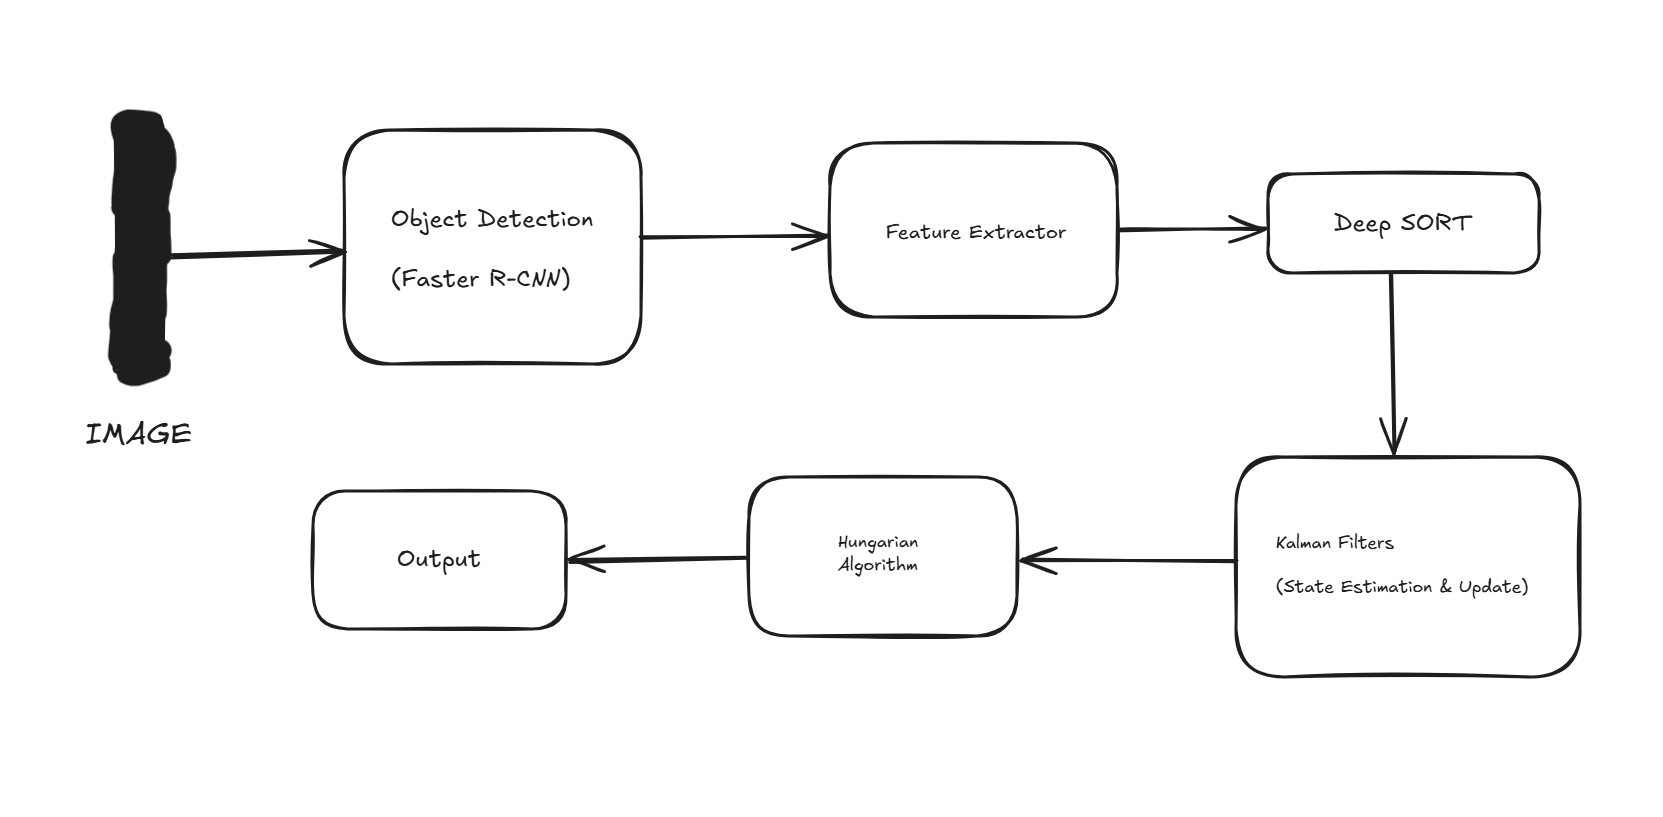

In [23]:
Image(filename='Architecture Deep SORT.png')

##### Hungarian Method

The Hungarian Method plays a critical role in DeepSORT by providing a robust and efficient way to associate new detections with existing tracks, ensuring accurate and consistent object tracking across video frames. It helps solve the assignment problem by finding the optimal matching that minimizes the total cost based on distance metrics. This ensures that tracks are assigned to the most likely detections, even if there are occlusions or temporary disappearances of objects.